# Netflix Movies and TV Shows


- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import squarify
import altair as alt
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
netflix = pd.read_csv("c:/KaggleData/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


 we can see this dataset contains 12 columns. we need to show specific this dataset.
- show_id : Unique ID for every Movie / Tv Show
- type : Identifier - A Movie or TV Show
- title : Title of the Movie / Tv Show
- director : Director of the Movie
- cast : Actors involved in the movie / show
- country : Country where the movie / show was produced
- data_added : Date it was added on Netflix
- release_year : Actual Release year of the move / show
- rating : TV Rating of the movie / show
- duration : Total Duration - in minutes or number of seasons
- listed_in : Genere
- description : The summary description

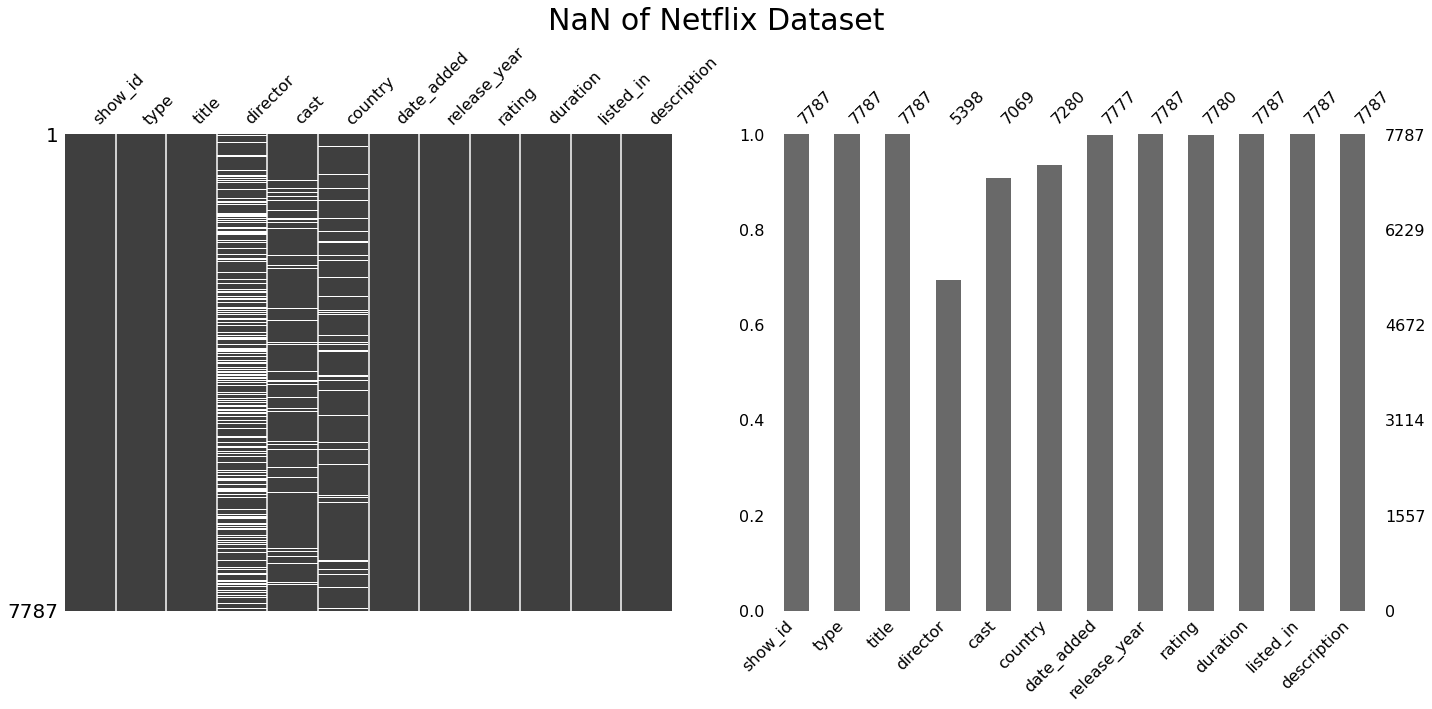

In [4]:
fix, ax = plt.subplots(ncols=2, figsize=(20,10))
msno.matrix(netflix.iloc[:,:],ax=ax[0])
msno.bar(netflix.iloc[:,:],ax=ax[1])
plt.suptitle("NaN of Netflix Dataset",fontsize=30)

plt.tight_layout()
plt.show()

In [5]:
for col in netflix.columns:
    null_rate = netflix[col].isna().sum() / len(netflix) * 100
    if null_rate > 0:
        print("{} Null rate: {}%".format(col,round(null_rate,2)))

director Null rate: 30.68%
cast Null rate: 9.22%
country Null rate: 6.51%
date_added Null rate: 0.13%
rating Null rate: 0.09%


## Dealing with data

### missing data
- director and cast columns's missing data will replace "No info"
- I will deal with country columns's missing data using mode (If categorical fator have missing data, we can replace mode per categoric)
- date_added and rating columns's missing data will be droped because of not mare than 1%.

### deal with 'date_added' type. 
- this column is object. I will change int.

In [67]:
# dicretor 
netflix['director'] = netflix['director'].replace(np.nan , 'No info')

# cast
netflix['cast'] = netflix['cast'].replace(np.nan , 'No info')

#country
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
# date_added and rate
netflix = netflix.dropna()

netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix['month_name_added'] = netflix['date_added'].dt.month_name()
day_added = netflix['date_added'].dt.weekday
day_mapping = {0:"MON",1:"TUS",2:"WEN",3:"THU",4:"FRI",5:"SAT",6:"SUN"}
func = lambda x: day_mapping.get(x, x)

netflix['day_added'] = day_added.map(func)

#Gennre
genre = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
idx=0
genre_li= []
for g in genre :
    idx +=0
    genre_li.append(g[idx])
netflix['genre'] = genre_li

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,day_added,gap_year,genre
0,s1,TV Show,3%,No info,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,August,FRI,0,International TV Shows
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,December,FRI,0,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,December,THU,7,Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,November,THU,8,Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,January,WEN,12,Dramas


# Visualization

## When uploaded Movie VS TV shows on Netflix?

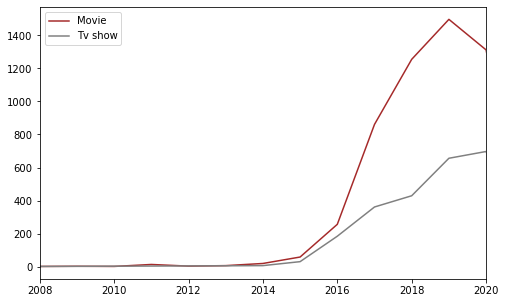

In [7]:
### Movie, tv show 생성

is_movie = netflix['type']=='Movie'
movie = netflix[is_movie]
is_tv = netflix['type']=='TV Show'
tv = netflix[is_tv]

m = movie['year_added'].value_counts().sort_index()
t = tv['year_added'].value_counts().sort_index()

fig = plt.figure(figsize = (8, 5))
chart = fig.add_subplot(1,1,1)
chart.plot(m,label='Movie',color='brown')
chart.plot(t,label='Tv show',color='gray')
chart.set_xlim(2008, 2020)
plt.legend(loc = 'best')
plt.show()

#### I find that It's soard between 2016 and 2019. we can see Netflix grow up dramatically.
### Then I want to know 'Content ratio of Movie and Tv show'

<Figure size 432x144 with 0 Axes>

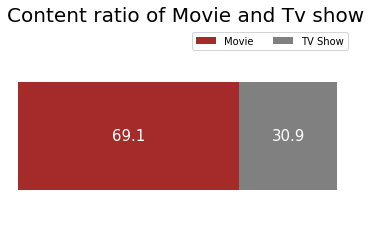

In [8]:
df = netflix.groupby('type')['type'].count()
df2 = df / len(netflix) * 100
df_ratio = pd.DataFrame(df2).T
plt.figure(figsize=(6, 2)) 

ax = df_ratio.plot(kind='barh', stacked=True,rot=0,color=('brown','gray'))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width), xy=(left+width/2, bottom+height/2),fontsize=15, ha='center', va='center',color='white') 

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.box(False)
plt.title("Content ratio of Movie and Tv show",fontsize=20)
ax.legend(ncol=2)
plt.show()

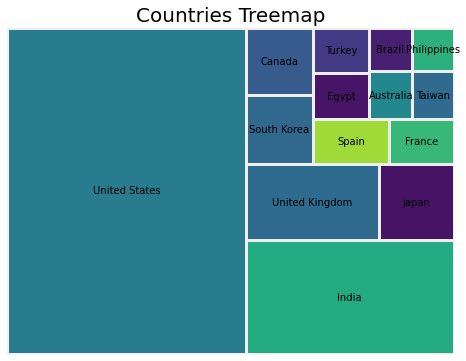

In [9]:
top15_country = netflix[(netflix['country']=='United States') | (netflix['country']=='India')| (netflix['country']=='United Kingdom')
       | (netflix['country']=='Japan')| (netflix['country']=='South Korea')| (netflix['country']=='Canada')
       | (netflix['country']=='Spain')| (netflix['country']=='France')| (netflix['country']=='Egypt')
       | (netflix['country']=='Turkey')| (netflix['country']=='Maxico')| (netflix['country']=='Australia')
       | (netflix['country']=='Taiwan')| (netflix['country']=='Brazil')| (netflix['country']=='Philippines')]

top15 = top15_country['country'].value_counts()
country = top15.index
value = top15.values
df_top15 = pd.DataFrame({'country':country,
             'value':value})
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 10
squarify.plot(sizes=top15.values,label = top15.index,
             bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
plt.axis('off')
plt.title('Countries Treemap',fontsize=20)
plt.show()

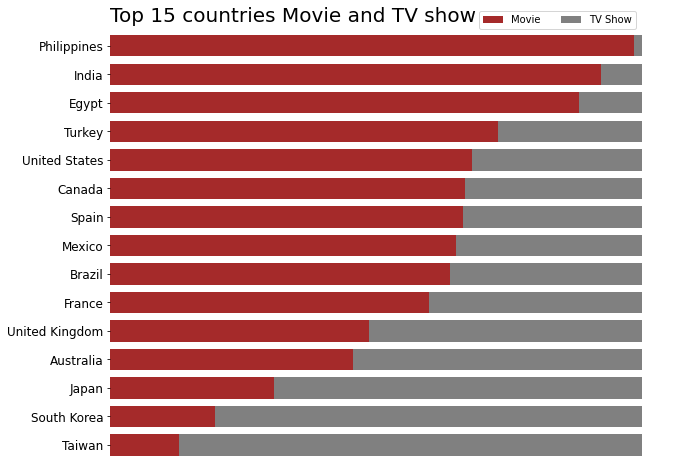

In [10]:
country_order = netflix['country'].value_counts()[:15].index
df_15 = netflix.groupby('country')['type'].value_counts().unstack().loc[country_order]
df_ratio_15 = pd.DataFrame()
df_ratio_15['Movie'] = df_15['Movie']/(df_15['Movie'] + df_15['TV Show']) *100
df_ratio_15['TV Show'] = df_15['TV Show']/(df_15['Movie'] + df_15['TV Show']) *100
df_ratio_15.set_index(df_15.index)
df_ratio_15=df_ratio_15.sort_values('Movie')

fix, ax = plt.subplots(figsize=(10,8))
df_ratio_15.plot(kind='barh', stacked=True,rot=0,color=('brown','gray'),width=0.75,ax=ax)
#ax.invert_yaxis()
ax.xaxis.set_visible(False)
plt.yticks(fontsize=12)
plt.box(False)
plt.title("Top 15 countries Movie and TV show",fontsize=20,loc="left")
plt.legend(bbox_to_anchor=(0.95, 1.05) ,ncol=2,loc="best")
plt.show()

- Most countries upload more Movie then TV show to netflix.
- Australia, Japan, Korea, and Taiwan have uploaded a lot of TV shows on Netflix, and it seems that Netflix and each country will need more research on why.
- For example, In Korea, the TV show market is actually larger than the movie market. So Beacuse the number of contents is different, there may be a difference in the number of content on Netflix.

## When was the content uploaded?

In [11]:
day = pd.DataFrame(netflix['day_added'].value_counts())

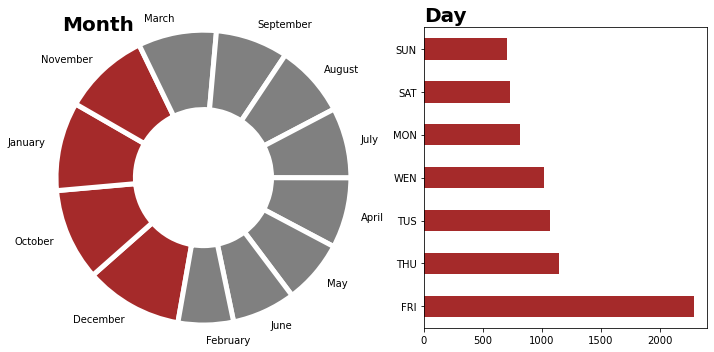

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label = netflix['month_name_added'].value_counts().index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
color_map = ['gray' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] = color_map[3]=  'brown'

ax1.pie(netflix['month_added'].value_counts(),
        radius=1.3, startangle=260, counterclock=False,
        labels=label,wedgeprops=wedgeprops , colors=color_map)

colors = ['brown','gray','gray','gray','gray','gray','gray']
day.plot(kind='barh',rot=0,color=colors, ax=ax2)
ax2.get_legend().remove()

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

ax1.set_title("Month",fontdict=title_font,loc="left")
ax2.set_title("Day",fontdict=title_font,loc="left")
plt.tight_layout()
plt.show()

- Upload Month : December, October, Janary, November
- Upload Day : Friday, (Thursday ,Tusday , Wednesday) 

## Gap at the time release and upload

In [13]:
netflix['gap_year']=netflix['year_added']-netflix['release_year']
year_country = netflix.groupby('gap_year')['country'].value_counts().reset_index(name='counts')
year_country['top15'] = year_country['country'].apply(lambda x : x in country_order)
year_country = year_country[year_country['top15']& (year_country['gap_year']<70)&((year_country['gap_year']>0))]
year_country.sort_values(by=['gap_year'], axis=0)

,gap_year,country,counts,top15
255,1,United States,507,True
272,1,Turkey,13,True
271,1,Mexico,13,True
270,1,Brazil,13,True
269,1,Philippines,14,True
...,...,...,...,...
1473,63,United States,1,True
1474,64,Egypt,1,True
1475,64,United States,1,True
1478,66,Egypt,1,True


In [14]:
idx = country_order
#.reset_index(name='counts')
alt.Chart(year_country).mark_area().encode(
    alt.X("gap_year"),
    alt.Y('counts',stack='normalize',axis=None),
    alt.Color("country",scale=alt.Scale(scheme='redgrey'),sort=list(idx))
)

alt.Chart(...)

#### This graph is really hard understanding data. So I will  adjust some limitation.
- take out 'United State' and 'India'. It interfere with interpretation Beacause The values is more than others.
- Gap year limit to 45 years or less.

In [15]:
idx = year_country[(year_country['country'] =='United States')|(year_country['country'] =='India')|(year_country['gap_year']>45)].index
year_country2 = year_country.drop(idx)
year_country2

#.reset_index(name='counts')
alt.Chart(year_country2).mark_area().encode(
    alt.X("gap_year"),
    alt.Y('counts',stack='center',axis=None),
    alt.Color("country",scale=alt.Scale(scheme='redgrey'),sort=list(idx))
)

alt.Chart(...)

- Through this graph, I can see that most of the content is uploaded to Netflix within five years of being produced.
That's probably true, Netflix has uploaded a lot of content since 2014, so it can seem natural.

## Genre

In [72]:
is_movie = netflix['type']=='Movie'
movie = netflix[is_movie]
is_tv = netflix['type']=='TV Show'
tv = netflix[is_tv]

In [190]:
def genre(netflix,title):
    netflix['genre2'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in netflix['genre2']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix Dataset") 
    test = netflix['genre2']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(0.3,0.90,'{} Genre correlation'.format(title),fontweight='bold',fontsize=15)
    pl = sns.heatmap(corr, mask=mask, cmap= "YlOrBr",vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()
# 참조 : https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver#Movie-&-TV-show-(Genre)

There are 20 types in the Netflix Dataset


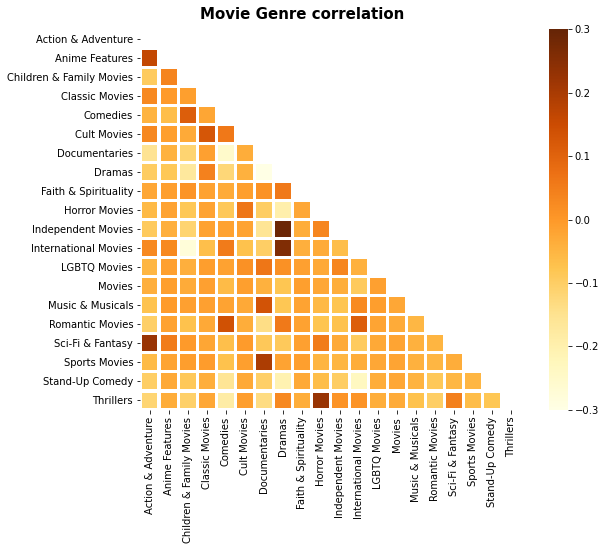

• Independent Mobies andInternational Movies tend to be Dramas
• Dramas are rarely in the Documentaries


In [191]:
genre(movie,"Movie")
print("• Independent Mobies andInternational Movies tend to be Dramas")
print("• Dramas are rarely in the Documentaries") 

There are 22 types in the Netflix Dataset


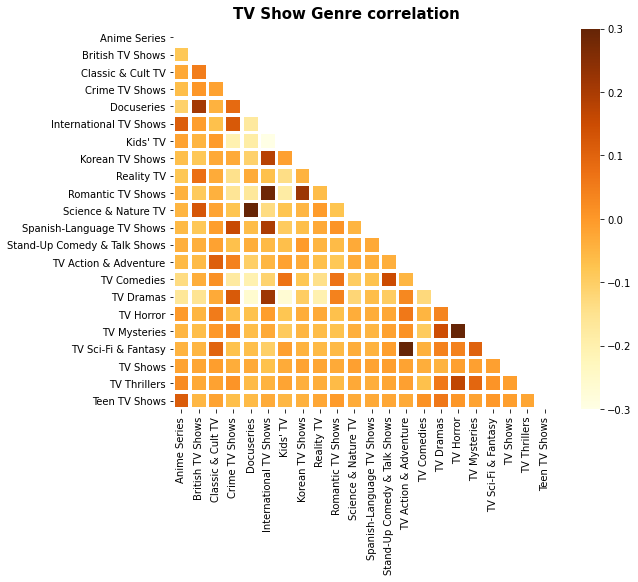

In [192]:
genre(tv,"TV Show")

## Rating
- I find "Motion Picture Association film rating system in USA" and "TV Parental Guidelines Monitoring Board" TV agin from WIKIPEDIA
- https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system
- https://en.wikipedia.org/wiki/TV_Parental_Guidelines

In [120]:
rating_ages = {'G' : 'Younger kids' ,'TV-G':'Younger kids',
              'R' : 'Adults','NR':'Adults','UR' : 'Adults',
              'NC-17': 'Adults','TV-MA' :'Adults',
              'PG-13':'Teenagers', 'TV-14' :'Teenagers',
              'TV-Y7': 'Older Kids','TV-Y7-FV' : 'Older Kids',
              'PG': 'Older Kids', 'TV-PG' :'Older Kids',
              'TV-Y' : 'Younger kids'}
movie['rating_age'] = movie['rating'].replace(rating_ages)
tv['rating_age'] = tv['rating'].replace(rating_ages)

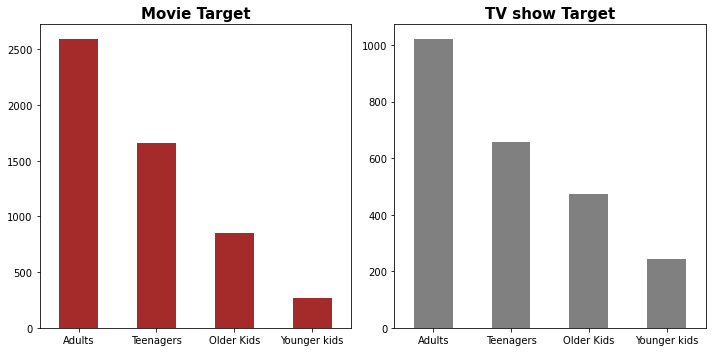

• To Compared the two charts, This is less TV show then Movie The different between the number of Teenagers and Older Kids in contents.


In [196]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
movie['rating_age'].value_counts().plot(kind='bar',rot=0,ax = ax1,color="brown")
tv['rating_age'].value_counts().plot(kind='bar',rot=0,ax = ax2,color="gray")

title_font = {
    'fontsize': 15,
    'fontweight': 'bold'}

ax1.set_title("Movie Target",fontdict=title_font)
ax2.set_title("TV show Target",fontdict=title_font)


plt.tight_layout()
plt.show()

print("• To Compared the two charts, This is less TV show then Movie The different between the number of Teenagers and Older Kids in contents.")

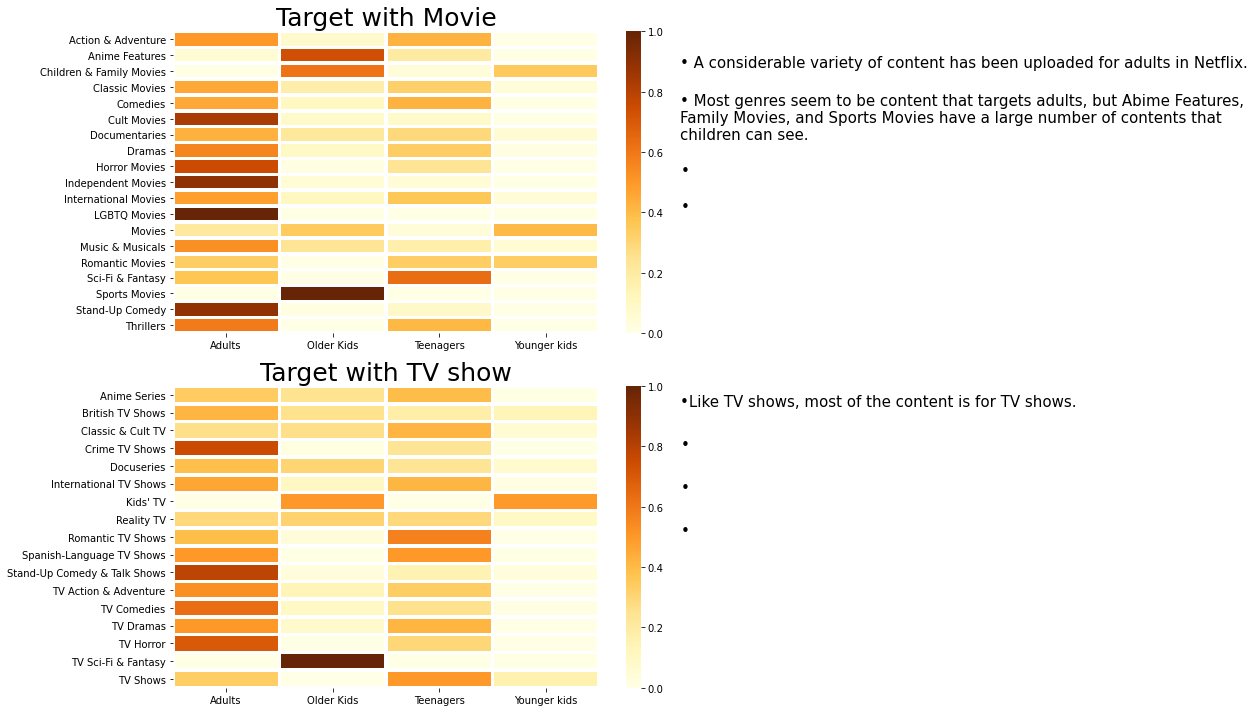

In [249]:
# 타겟과 장르 히트맵
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
heat_movie = pd.crosstab(movie['genre'],movie['rating_age'],normalize="index").rename_axis(None,axis=1)
heat_tv = pd.crosstab(tv['genre'],tv['rating_age'],normalize="index").rename_axis(None,axis=1)


sns.heatmap(heat_movie, linewidth=2.5,center=0.5,cmap='YlOrBr',ax=ax1)
sns.heatmap(heat_tv,linewidth=2.5,center=0.5,cmap='YlOrBr',ax=ax2)

ax1.set_title("Target with Movie",fontsize=25)
ax2.set_title("Target with TV show",fontsize=25)

ax1.set_ylabel('')            
ax2.set_ylabel('')            
ax1.set_xlabel('')            
ax2.set_xlabel('')  

fig.text(0.95,0.9,"• A considerable variety of content has been uploaded for adults in Netflix.",fontsize=15)
fig.text(0.95,0.8,'''• Most genres seem to be content that targets adults, but Abime Features,
Family Movies, and Sports Movies have a large number of contents that 
children can see. ''', fontsize=15)
fig.text(0.95,0.75,"•", fontsize=15)
fig.text(0.95,0.7,"•", fontsize=15)

fig.text(0.95,0.43,"•Like TV shows, most of the content is for TV shows.", fontsize=15)
fig.text(0.95,0.37,"•", fontsize=15)
fig.text(0.95,0.31,"•", fontsize=15)
fig.text(0.95,0.25,"•", fontsize=15)

plt.tight_layout()
plt.show()